In [ ]:
import pandas as NewsDetPd
import warnings as NewsDetWng
NewsDetWng.filterwarnings('ignore')
News_Detect = NewsDetPd.read_csv("FastTextNews_Covid19.csv")
News_Detect

,FastText_News,Label
0,"['tencent', 'reveal', 'real', 'number', 'death']",0
1,"['take', 'chlorin', 'dioxid', 'help', 'fight',...",0
2,"['video', 'show', 'workmen', 'uncov', 'batinfe...",0
3,"['asterix', 'comic', 'book', 'simpson', 'predi...",0
4,"['chines', 'presid', 'xi', 'jinp', 'visit', 'm...",0
...,...,...
7251,"['global', 'covid', 'prevent', 'trial', 'hydro...",1
7252,"['bavaria', 'free', 'covid', 'test', 'split', ...",1
7253,"['britain', 'lock', 'citi', 'leicest', 'covid'...",1
7254,"['uk', 'impos', 'lockdown', 'citi', 'leicest',...",1


In [ ]:
News_Detect.info()
News_Detect['Label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   FastText_News  7256 non-null   object
 1   Label          7256 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 113.5+ KB


,count
Label,
1,3792
0,3464


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer as NewsDet_Tfvect
from sklearn.decomposition import PCA as NewsDetPcomponent
from sklearn.model_selection import train_test_split as NewsDet_trntst

#======== Input and Output
News_DetectX = News_Detect.drop('Label',axis=1)
News_DetectY = News_Detect['Label']

#======== Vectorization Covid19
NewsDetect_Vtc = NewsDet_Tfvect(analyzer='word',ngram_range= (1,1))
News_DetectX = NewsDetect_Vtc.fit_transform(News_Detect['FastText_News'].values.astype('U')).toarray()
print("Vectorized Shape of Covid19 FastText News: ",News_DetectX.shape)

#======== Reducting Dimensions Covid19
newsdetPca = NewsDetPcomponent(n_components = 100)
News_DetectX = newsdetPca.fit_transform(News_DetectX)
print("\nReduction Shape of Covid19 FastText News: ",News_DetectX.shape)

#======== Splitting 60-20-20 ratio Covid19
News_Detect['Label'] = News_Detect['Label'].astype(int)
NewsDetX_tr, NewsDetX_ts, NewsDetY_tr, NewsDetY_ts = NewsDet_trntst(News_DetectX, News_Detect['Label'], test_size=0.4, random_state=70)
NewsDetX_va, NewsDetX_ts, NewsDetY_va, NewsDetY_ts = NewsDet_trntst(NewsDetX_ts, NewsDetY_ts, test_size=0.5, random_state=70)
print("\nTraining Covid19 FastText News: ",NewsDetX_tr.shape)
print("Validation Covid19 FastText News: ",NewsDetX_va.shape)
print("Testing Covid19 FastText News: ",NewsDetX_ts.shape)

Vectorized Shape of Covid19 FastText News:  (7256, 9998)

Reduction Shape of Covid19 FastText News:  (7256, 100)

Training Covid19 FastText News:  (4353, 100)
Validation Covid19 FastText News:  (1451, 100)
Testing Covid19 FastText News:  (1452, 100)


### CNN Model

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.5182 - loss: 0.2499 - val_accuracy: 0.5382 - val_loss: 0.2485
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.5500 - loss: 0.2487 - val_accuracy: 0.5782 - val_loss: 0.2478
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.5680 - loss: 0.2473 - val_accuracy: 0.5920 - val_loss: 0.2462
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.5718 - loss: 0.2462 - val_accuracy: 0.5934 - val_loss: 0.2450
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.5726 - loss: 0.2449 - val_accuracy: 0.5989 - val_loss: 0.2434
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.5836 - loss: 0.2430 - val_accuracy: 0.5899 - val_loss: 0.2424
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.5754 - loss: 0.2423 - val_accuracy: 0.5996 - val_loss: 0.2404
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5838 - loss: 0.2408 - val_accuracy: 0.5927 - val_loss: 0

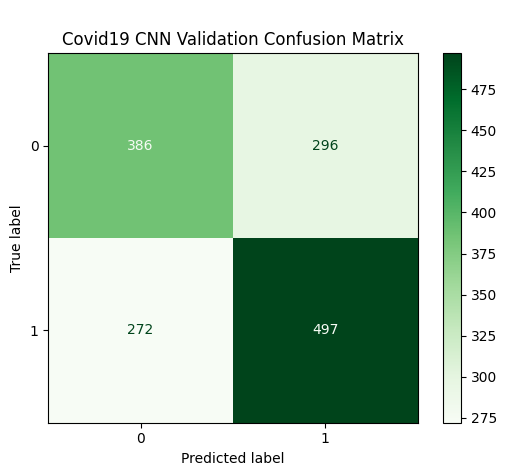

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       670
           1       0.66      0.69      0.68       782

    accuracy                           0.64      1452
   macro avg       0.64      0.64      0.64      1452
weighted avg       0.64      0.64      0.64      1452



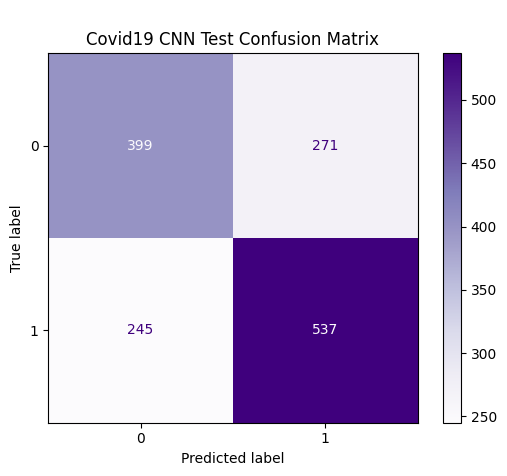

In [ ]:
import numpy as NewsDetNpp
import matplotlib.pyplot as Newsplt
from tensorflow.keras.models import Sequential as NewsDetSeqnt
from tensorflow.keras.optimizers import Adam as NewsDetAdmm
from sklearn.metrics import classification_report as NewsDetClfrpt
from sklearn.metrics import confusion_matrix as NewsDetCnMtrx
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D, Flatten, Input
from sklearn.metrics import ConfusionMatrixDisplay as NewsDetDsp

NewsDetIp_shape = NewsDetX_tr.shape[1]

#======== Define CNN model for Covid19
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=128, kernel_size=3, activation='tanh', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='tanh'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=20,batch_size=500)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()


### Random Forest

Random Forest - Best Parameters:

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 90, 'n_jobs': 1}

Covid19 Validation - RF Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       682
           1       0.88      0.92      0.90       769

    accuracy                           0.89      1451
   macro avg       0.89      0.89      0.89      1451
weighted avg       0.89      0.89      0.89      1451



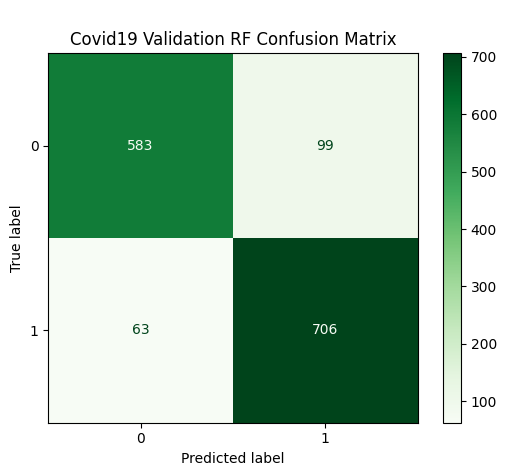


Covid19 Test - RF Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       670
           1       0.89      0.93      0.91       782

    accuracy                           0.90      1452
   macro avg       0.90      0.90      0.90      1452
weighted avg       0.90      0.90      0.90      1452



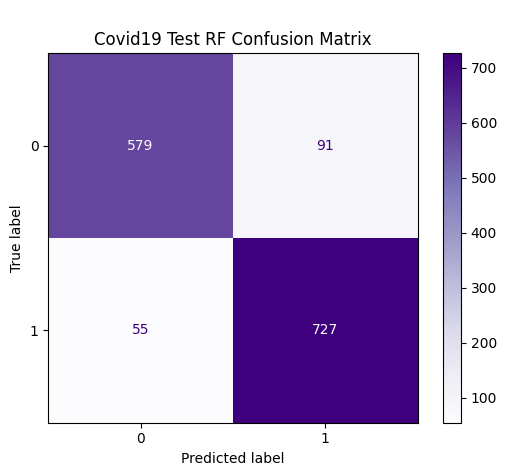

In [ ]:
from sklearn.ensemble import RandomForestClassifier as NewsDet_RanFC
from sklearn.model_selection import GridSearchCV as NewsDet_GridCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

NewsDetPmeters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 1, 2, 3],
    'n_estimators': [20, 30, 90],
    'n_jobs': [1, 2, 4],
}

NewsDetClfier = NewsDet_RanFC(random_state=70)
NewsDetGrsrch = NewsDet_GridCV(estimator=NewsDetClfier, param_grid=NewsDetPmeters, cv=2)
NewsDetGrsrch.fit(NewsDetX_tr, NewsDetY_tr)

print("Random Forest - Best Parameters:\n")
print(NewsDetGrsrch.best_params_)
NewsDet_BstMod = NewsDetGrsrch.best_estimator_

#====== Train the Covid19 FastText
NewsDet_BstMod.fit(NewsDetX_tr, NewsDetY_tr)

#======= Predict on Covid19 FastText validation
NewsDet_Ypd = NewsDet_BstMod.predict(NewsDetX_va)
print("\nCovid19 Validation - RF Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 Validation RF Confusion Matrix')
Newsplt.show()

#======== Predict on Covid19 FastText Testing
NewsDet_Ypd = NewsDet_BstMod.predict(NewsDetX_ts)
print("\nCovid19 Test - RF Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 Test RF Confusion Matrix')
Newsplt.show()

### Logistic Regression

Logistic Regression - Best Parameters:

{'C': 0.8, 'fit_intercept': True, 'n_jobs': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

Covid19 Validation - LR Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       682
           1       0.89      0.91      0.90       769

    accuracy                           0.89      1451
   macro avg       0.89      0.89      0.89      1451
weighted avg       0.89      0.89      0.89      1451



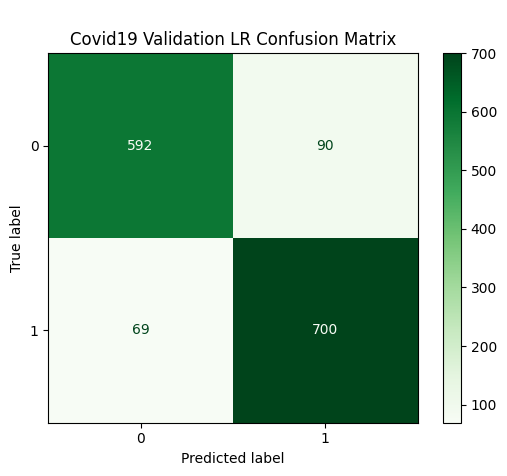


Covid19 Test - LR Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       670
           1       0.90      0.92      0.91       782

    accuracy                           0.90      1452
   macro avg       0.91      0.90      0.90      1452
weighted avg       0.90      0.90      0.90      1452



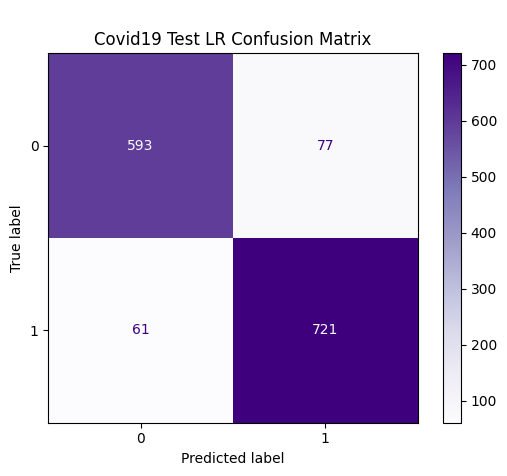

In [ ]:
from sklearn.linear_model import LogisticRegression as NewsDet_LReg
NewsDetPmeters = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [0.1, 0.2, 0.3, 0.8],
    'fit_intercept': [True, False],
    'n_jobs': [1, 2, 4],
}

NewsDetClfier = NewsDet_LReg(random_state=70)
NewsDetGrsrch = NewsDet_GridCV(estimator=NewsDetClfier, param_grid=NewsDetPmeters, cv=2)
NewsDetGrsrch.fit(NewsDetX_tr, NewsDetY_tr)

print("Logistic Regression - Best Parameters:\n")
print(NewsDetGrsrch.best_params_)
NewsDet_BstMod = NewsDetGrsrch.best_estimator_

#====== Train the Covid19 FastText
NewsDet_BstMod.fit(NewsDetX_tr, NewsDetY_tr)

#======= Predict on Covid19 FastText validation
NewsDet_Ypd = NewsDet_BstMod.predict(NewsDetX_va)
print("\nCovid19 Validation - LR Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 Validation LR Confusion Matrix')
Newsplt.show()

#======== Predict on Covid19 FastText Testing
NewsDet_Ypd = NewsDet_BstMod.predict(NewsDetX_ts)
print("\nCovid19 Test - LR Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 Test LR Confusion Matrix')
Newsplt.show()

### Extra Trees

Extra Trees - Best Parameters:

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 90, 'n_jobs': 1}

Covid19 Validation - ET Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       682
           1       0.90      0.90      0.90       769

    accuracy                           0.89      1451
   macro avg       0.89      0.89      0.89      1451
weighted avg       0.89      0.89      0.89      1451



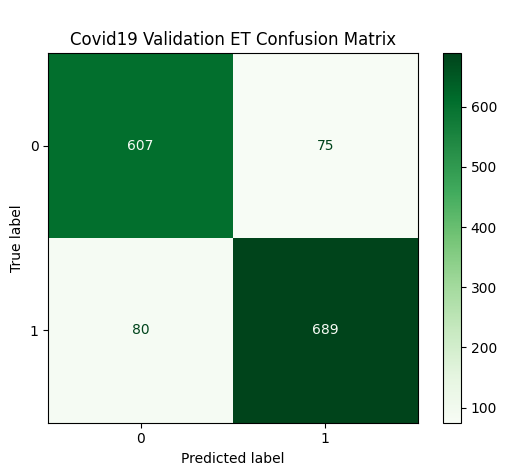


Covid19 Test - ET Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       670
           1       0.91      0.92      0.91       782

    accuracy                           0.91      1452
   macro avg       0.91      0.91      0.91      1452
weighted avg       0.91      0.91      0.91      1452



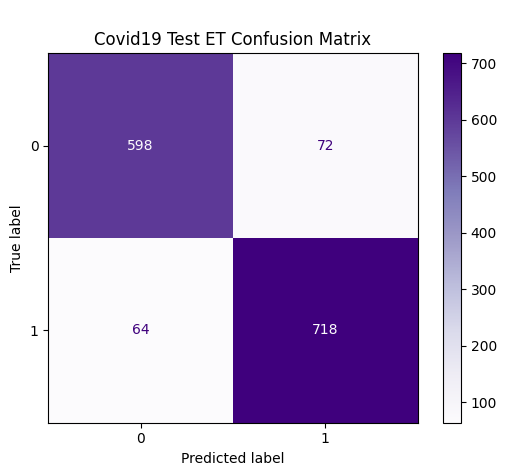

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier as NewsDet_ExTr

NewsDetPmeters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 1, 2, 3],
    'n_estimators': [20, 30, 90],
    'n_jobs': [1, 2, 4],
}

NewsDetClfier = NewsDet_ExTr(random_state=70)
NewsDetGrsrch = NewsDet_GridCV(estimator=NewsDetClfier, param_grid=NewsDetPmeters, cv=2)
NewsDetGrsrch.fit(NewsDetX_tr, NewsDetY_tr)

print("Extra Trees - Best Parameters:\n")
print(NewsDetGrsrch.best_params_)
NewsDet_BstMod = NewsDetGrsrch.best_estimator_

#====== Train the Covid19 FastText
NewsDet_BstMod.fit(NewsDetX_tr, NewsDetY_tr)

#======= Predict on Covid19 FastText validation
NewsDet_Ypd = NewsDet_BstMod.predict(NewsDetX_va)
print("\nCovid19 Validation - ET Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 Validation ET Confusion Matrix')
Newsplt.show()

#======== Predict on Covid19 FastText Testing
NewsDet_Ypd = NewsDet_BstMod.predict(NewsDetX_ts)
print("\nCovid19 Test - ET Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 Test ET Confusion Matrix')
Newsplt.show()

### Gradient Boosting Machine

Gradient Boosting Machine - Best Parameters:

{'learning_rate': 0.2, 'loss': 'exponential', 'min_samples_split': 2, 'n_estimators': 90}

Covid19 Validation - GB Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       682
           1       0.89      0.91      0.90       769

    accuracy                           0.90      1451
   macro avg       0.90      0.89      0.90      1451
weighted avg       0.90      0.90      0.90      1451



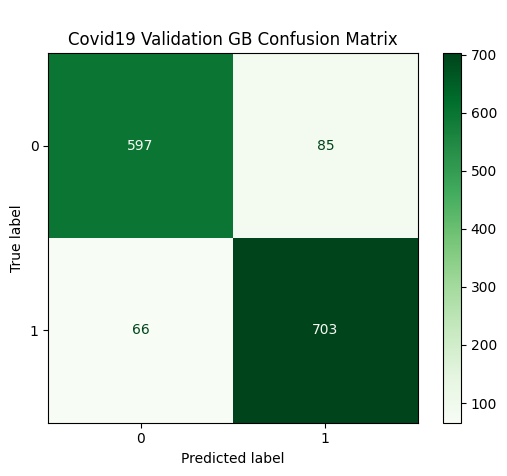


Covid19 Test - GB Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       670
           1       0.90      0.92      0.91       782

    accuracy                           0.90      1452
   macro avg       0.90      0.90      0.90      1452
weighted avg       0.90      0.90      0.90      1452



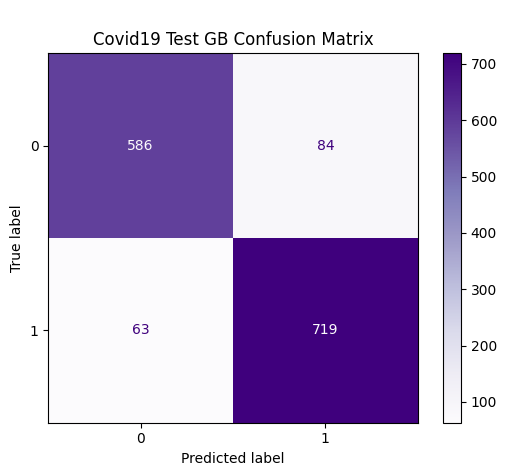

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as NewsDet_GBMachine
NewsDetPmeters = {
    'loss': ['log_loss', 'exponential', 'log_loss'],
    'learning_rate': [0.1, 0.001, 0.0001, 0.2],
    'n_estimators': [20, 30, 90],
    'min_samples_split': [1, 2, 4],
}

NewsDetClfier = NewsDet_GBMachine(random_state=70)
NewsDetGrsrch = NewsDet_GridCV(estimator=NewsDetClfier, param_grid=NewsDetPmeters, cv=2)
NewsDetGrsrch.fit(NewsDetX_tr, NewsDetY_tr)

print("Gradient Boosting Machine - Best Parameters:\n")
print(NewsDetGrsrch.best_params_)
NewsDet_BstMod = NewsDetGrsrch.best_estimator_

#====== Train the Covid19 FastText
NewsDet_BstMod.fit(NewsDetX_tr, NewsDetY_tr)

#======= Predict on Covid19 FastText validation
NewsDet_Ypd = NewsDet_BstMod.predict(NewsDetX_va)
print("\nCovid19 Validation - GB Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 Validation GB Confusion Matrix')
Newsplt.show()

#======== Predict on Covid19 FastText Testing
NewsDet_Ypd = NewsDet_BstMod.predict(NewsDetX_ts)
print("\nCovid19 Test - GB Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 Test GB Confusion Matrix')
Newsplt.show()

### Stochastic Gradient Descent

Stochastic Gradient Descent - Best Parameters:

{'alpha': 0.001, 'fit_intercept': False, 'loss': 'squared_hinge', 'n_jobs': 1, 'penalty': 'elasticnet'}

Covid19 Validation - SGD Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       682
           1       0.89      0.91      0.90       769

    accuracy                           0.89      1451
   macro avg       0.89      0.89      0.89      1451
weighted avg       0.89      0.89      0.89      1451



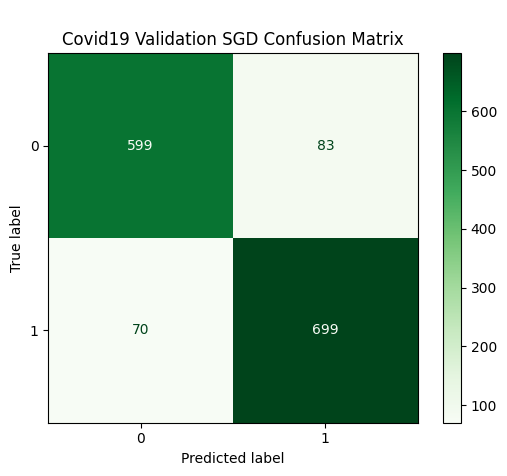


Covid19 Test - SGD Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       670
           1       0.91      0.91      0.91       782

    accuracy                           0.90      1452
   macro avg       0.90      0.90      0.90      1452
weighted avg       0.90      0.90      0.90      1452



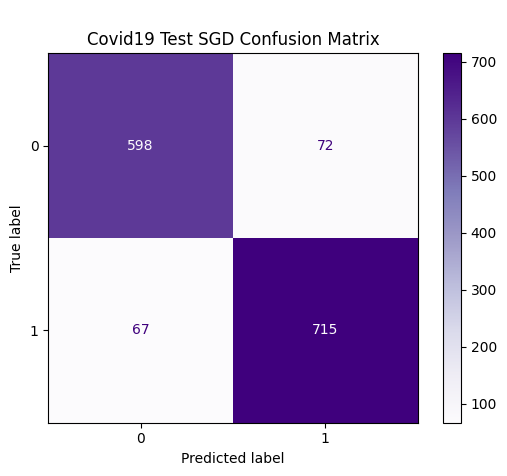

In [ ]:
from sklearn.linear_model import SGDClassifier as NewsDet_SGradienr
NewsDetPmeters = {
    'loss': ['hinge', 'log_loss', 'modified_huber','squared_hinge','perceptron'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.1, 0.02, 0.001, 0.00001],
    'fit_intercept': [True, False],
    'n_jobs': [1, 2, 4],
}

NewsDetClfier = NewsDet_SGradienr(random_state=70)
NewsDetGrsrch = NewsDet_GridCV(estimator=NewsDetClfier, param_grid=NewsDetPmeters, cv=2)
NewsDetGrsrch.fit(NewsDetX_tr, NewsDetY_tr)

print("Stochastic Gradient Descent - Best Parameters:\n")
print(NewsDetGrsrch.best_params_)
NewsDet_BstMod = NewsDetGrsrch.best_estimator_

#====== Train the Covid19 FastText
NewsDet_BstMod.fit(NewsDetX_tr, NewsDetY_tr)

#======= Predict on Covid19 FastText validation
NewsDet_Ypd = NewsDet_BstMod.predict(NewsDetX_va)
print("\nCovid19 Validation - SGD Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 Validation SGD Confusion Matrix')
Newsplt.show()

#======== Predict on Covid19 FastText Testing
NewsDet_Ypd = NewsDet_BstMod.predict(NewsDetX_ts)
print("\nCovid19 Test - SGD Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 Test SGD Confusion Matrix')
Newsplt.show()